In [524]:
import keras
import numpy as np
from keras.datasets import mnist
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [455]:
# Getting MNIST Data, reshaping it, and separating into train and test

(train_X, l_train), (test_X, l_test) = mnist.load_data()
train_y = np.zeros((l_train.shape[0], l_train.max()+1), dtype=np.float32)
train_y[np.arange(l_train.shape[0]), l_train] = 1
test_y = np.zeros((l_test.shape[0], l_test.max()+1), dtype=np.float32)
test_y[np.arange(l_test.shape[0]), l_test] = 1

test_X = np.reshape(test_X, (10000, 28 * 28))
test_X = test_X/255.0
train_X = np.reshape(train_X, (60000, 28 * 28))
train_X = train_X/255.0

# 3.2

I am using online stochastic gradient descent, which is where I estimate the gradient of the cost function for each train value and update the weights accordingly after every observation

In [537]:
def sig(x):
    return 1.0/(1.0 + np.exp(-x))
    
def sig_der(x):
    return sig(x) * (1-sig(x))

def calc_loss(y_hat, y):
    return np.sum(np.multiply(y, np.log(y_hat)) * -1.0) 


def fit(w1, w2, w3, x, y, itr):
    learning_rate = 0.05
    
    for i in range(itr):
        # calculate all activation functions
        z1 = np.matmul(w1, x)
        a1 = sig(z1)
        
        z2 = np.matmul(w2, a1)
        a2 = sig(z2)

        z3 = np.matmul(w3, a2)
        y_hat = np.exp(z3)/np.sum(np.exp(z3), axis=0)
        
        # loss
        loss = calc_loss(y_hat, y)
        
        #backwards_propagation
        
        #W3
        dz3 = y_hat.flatten() - y
        dz3 = dz3.reshape((-1,1))
        a2 = a2.reshape((1,-1))
        dw3 = np.matmul(dz3, a2)
        
        
        #W2    
        da2 = np.matmul(w3.T, dz3) 
        z2 = z2.reshape((-1,1))
        dz2 = da2 * sig(z2) * (1-sig(z2))
        a1 = a1.reshape((1,-1))
        dw2 = np.matmul(dz2, a1)
        
        #W1
        da1 = np.matmul(w2.T, dz2)
        z1 = z1.reshape((-1,1))
        dz1 = da1 * sig(z1) * (1-sig(z1))
        x = x.reshape((-1,1))
        dw1 = np.matmul(dz1, x.T)
        
        
        #adjust weights
        w3 = w3 - learning_rate * dw3
        w2 = w2 - learning_rate * dw2
        w1 = w1 - learning_rate * dw1 
        
    return w1, w2, w3
    

"""
Return weights for 3 layer neural network with given dimensions
"""    
def createnn(d, d1, d2, k, x_train, y_train, x_test, y_test, itr):
    
    #initialize weights for each layer
    w1 = np.random.randn(d1, d)
    w2 = np.random.randn(d2, d1)
    w3 = np.random.randn(k, d2)
    
    #accuracies
    val_acc = []
    train_acc = []
    val_loss = []
    train_loss = []
    
    for i in range(len(x_train)-1):
        w1, w2, w3 = fit(w1, w2, w3, x_train[i], y_train[i], itr)
        
        # Calculate train and validation loss/acc after every epoch
        if ((i+1)%6000 == 0):
            train, trainl = predict(w1,w2,w3,x_train,y_train)
            val, vall = predict(w1,w2,w3,x_test,y_test)
            print("EPOCH: ", str(int((i+1)/6000)))
            print("Train Acc: ", str(train))
            print("Train Loss: ", str(trainl))
            print("Val Acc: ", str(val))
            print("Val Loss: ", str(vall))
            
            val_acc.append(val)
            train_acc.append(train)
            val_loss.append(vall)
            train_loss.append(trainl)
            
    
    return w1, w2, w3, val_acc, train_acc, val_loss, train_loss

"""
Calculate accuracy/loss for given test set
"""
def predict(w1, w2, w3, x, y):
    accuracy = 0
    loss = 0
    for i in range(len(x) - 1):
        z1 = np.matmul(w1, x[i])
   
        a1 = sig(z1)
        
        z2 = np.matmul(w2, a1)
        a2 = sig(z2) 
        
        z3 = np.matmul(w3, a2)
        
        y_hat = np.exp(z3)/np.sum(np.exp(z3), axis=0)
        
        loss = loss + calc_loss(y_hat, y[i])
        
        if(np.argmax(y_hat, axis=0) == np.argmax(y[i], axis=0)):
              accuracy += 1
        
    return accuracy/len(x), loss/len(x)
    


In [576]:
w1, w2, w3, val_acc, train_acc, val_loss, train_loss = createnn(784, 300, 200, 10, train_X, train_y, test_X, test_y, 1)

EPOCH:  1
Train Acc:  0.8311666666666667
Train Loss:  0.5570372410350806
Val Acc:  0.8336
Val Loss:  0.5480326973663233
EPOCH:  2
Train Acc:  0.84275
Train Loss:  0.5357326846716517
Val Acc:  0.8442
Val Loss:  0.5254936529789549
EPOCH:  3
Train Acc:  0.8647166666666667
Train Loss:  0.4598842541008703
Val Acc:  0.8662
Val Loss:  0.4593086197281989
EPOCH:  4
Train Acc:  0.9013666666666666
Train Loss:  0.33175099979101524
Val Acc:  0.9043
Val Loss:  0.32601206911456343
EPOCH:  5
Train Acc:  0.8838666666666667
Train Loss:  0.38500991456279376
Val Acc:  0.8889
Val Loss:  0.3820109594732523
EPOCH:  6
Train Acc:  0.8927666666666667
Train Loss:  0.36146533143456244
Val Acc:  0.8939
Val Loss:  0.3664006388057769
EPOCH:  7
Train Acc:  0.8778333333333334
Train Loss:  0.4059708116620026
Val Acc:  0.8784
Val Loss:  0.424537242921511
EPOCH:  8
Train Acc:  0.9106
Train Loss:  0.310336196124468
Val Acc:  0.9065
Val Loss:  0.3253389955250892
EPOCH:  9
Train Acc:  0.90695
Train Loss:  0.3059358394277657

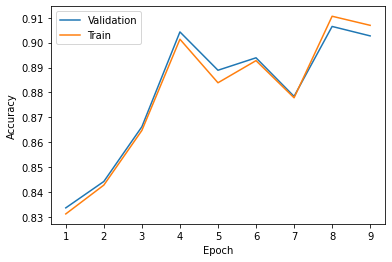

In [577]:
# Plotting
x = [1,2,3,4,5,6,7,8,9]
plt.plot(x, val_acc, label = "Validation")
plt.plot(x, train_acc, label = "Train")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

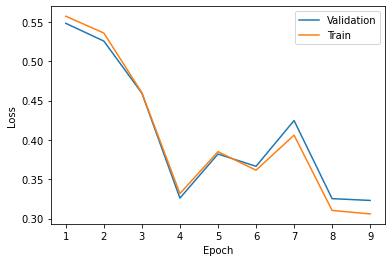

In [578]:
plt.plot(x, val_loss, label = "Validation")
plt.plot(x, train_loss, label = "Train")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 3.3

In [579]:

from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

In [580]:
#Neural net with keras. Created same 3 layer neural network with same dimensions

model = Sequential()
model.add(Dense(300, activation='sigmoid', input_dim=784))
model.add(Dense(200, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, nesterov=True)

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
        
hist = model.fit(train_X,train_y, epochs=10, batch_size=32, verbose=2, validation_split=0.2)


Epoch 1/10
1500/1500 - 4s - loss: 2.1983 - accuracy: 0.3166 - val_loss: 2.0404 - val_accuracy: 0.5831 - 4s/epoch - 3ms/step
Epoch 2/10
1500/1500 - 3s - loss: 1.7492 - accuracy: 0.6180 - val_loss: 1.3983 - val_accuracy: 0.7172 - 3s/epoch - 2ms/step
Epoch 3/10
1500/1500 - 3s - loss: 1.1300 - accuracy: 0.7579 - val_loss: 0.8828 - val_accuracy: 0.8119 - 3s/epoch - 2ms/step
Epoch 4/10
1500/1500 - 3s - loss: 0.7823 - accuracy: 0.8155 - val_loss: 0.6535 - val_accuracy: 0.8463 - 3s/epoch - 2ms/step
Epoch 5/10
1500/1500 - 3s - loss: 0.6223 - accuracy: 0.8422 - val_loss: 0.5432 - val_accuracy: 0.8623 - 3s/epoch - 2ms/step
Epoch 6/10
1500/1500 - 3s - loss: 0.5370 - accuracy: 0.8596 - val_loss: 0.4800 - val_accuracy: 0.8749 - 3s/epoch - 2ms/step
Epoch 7/10
1500/1500 - 3s - loss: 0.4838 - accuracy: 0.8696 - val_loss: 0.4380 - val_accuracy: 0.8831 - 3s/epoch - 2ms/step
Epoch 8/10
1500/1500 - 3s - loss: 0.4475 - accuracy: 0.8782 - val_loss: 0.4086 - val_accuracy: 0.8898 - 3s/epoch - 2ms/step
Epoch 9/

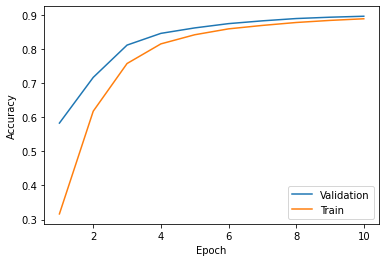

In [581]:
#Plotting
x = [1,2,3,4,5,6,7,8,9,10]
plt.plot(x, hist.history['val_accuracy'], label = "Validation")
plt.plot(x, hist.history['accuracy'], label = "Train")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

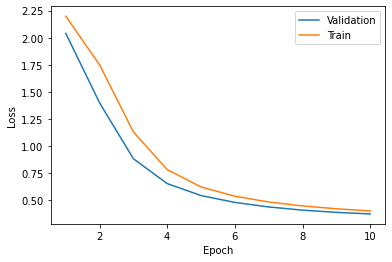

In [582]:
plt.plot(x,hist.history['val_loss'], label = "Validation")
plt.plot(x, hist.history['loss'], label = "Train")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 3.4

It appears that the accuracy of the model when initializing the weights to zero is drastically lower than using random values between -1 and 1. I got similar results when using my own implementation of the 3NN(Results for this aren't in this notebook).

In [583]:
# First model a, with all weights initialized to zero
modela = Sequential()
modela.add(Dense(300, kernel_initializer='zero', activation='sigmoid', input_dim=784))
modela.add(Dense(200, kernel_initializer='zero',activation='sigmoid'))
modela.add(Dense(10, kernel_initializer='zero',activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, nesterov=True)

print(modela.get_weights())


[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [584]:
modela.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
        
hista = modela.fit(train_X,train_y, epochs=10, batch_size=32, verbose=2, validation_split=0.2)

Epoch 1/10
1500/1500 - 4s - loss: 2.3044 - accuracy: 0.1067 - val_loss: 2.3077 - val_accuracy: 0.1060 - 4s/epoch - 2ms/step
Epoch 2/10
1500/1500 - 3s - loss: 2.3045 - accuracy: 0.1098 - val_loss: 2.3054 - val_accuracy: 0.0975 - 3s/epoch - 2ms/step
Epoch 3/10
1500/1500 - 3s - loss: 2.3044 - accuracy: 0.1076 - val_loss: 2.3050 - val_accuracy: 0.1035 - 3s/epoch - 2ms/step
Epoch 4/10
1500/1500 - 3s - loss: 2.3049 - accuracy: 0.1064 - val_loss: 2.3056 - val_accuracy: 0.1060 - 3s/epoch - 2ms/step
Epoch 5/10
1500/1500 - 3s - loss: 2.3044 - accuracy: 0.1078 - val_loss: 2.3086 - val_accuracy: 0.1060 - 3s/epoch - 2ms/step
Epoch 6/10
1500/1500 - 3s - loss: 2.3042 - accuracy: 0.1093 - val_loss: 2.3057 - val_accuracy: 0.1060 - 3s/epoch - 2ms/step
Epoch 7/10
1500/1500 - 3s - loss: 2.3044 - accuracy: 0.1082 - val_loss: 2.3038 - val_accuracy: 0.1081 - 3s/epoch - 2ms/step
Epoch 8/10
1500/1500 - 3s - loss: 2.3042 - accuracy: 0.1087 - val_loss: 2.3033 - val_accuracy: 0.1060 - 3s/epoch - 2ms/step
Epoch 9/

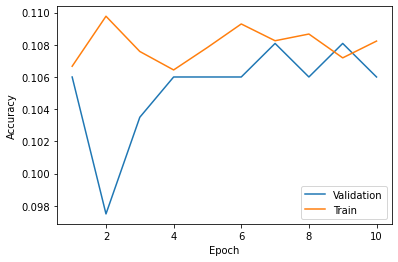

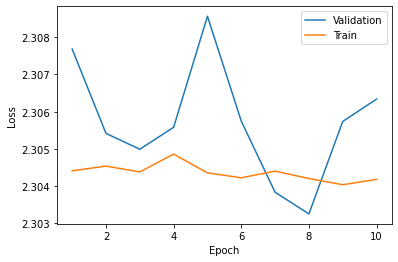

In [585]:
# Loss and accuracy plots for Model A
plt.plot(x, hista.history['val_accuracy'], label = "Validation")
plt.plot(x, hista.history['accuracy'], label = "Train")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(x,hista.history['val_loss'], label = "Validation")
plt.plot(x, hista.history['loss'], label = "Train")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [586]:
# Model b has weights initizilized between -1 and 1
modelb = Sequential()
modelb.add(Dense(300, activation='sigmoid', input_dim=784))
modelb.add(Dense(200,activation='sigmoid'))
modelb.add(Dense(10,activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, nesterov=True)

print(modelb.get_weights())

[array([[ 0.04717072, -0.02879395,  0.07087345, ..., -0.03700938,
         0.01343582,  0.05346981],
       [ 0.02091469,  0.04082945, -0.01521993, ..., -0.03157115,
         0.05671364,  0.05385549],
       [ 0.02650871, -0.01041343,  0.04555168, ...,  0.07127732,
        -0.03308523, -0.00208647],
       ...,
       [ 0.0153925 , -0.04396009,  0.06100282, ..., -0.05944764,
        -0.02100118, -0.06191402],
       [-0.03782709,  0.0150398 , -0.044173  , ..., -0.01100148,
        -0.01921208, -0.00037546],
       [-0.04283232,  0.00988587,  0.01437451, ...,  0.05246277,
        -0.00401081, -0.03275708]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [587]:
modelb.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
        
histb = modelb.fit(train_X,train_y, epochs=10, batch_size=32, verbose=2, validation_split=0.2)

Epoch 1/10
1500/1500 - 3s - loss: 2.1956 - accuracy: 0.3318 - val_loss: 2.0361 - val_accuracy: 0.6002 - 3s/epoch - 2ms/step
Epoch 2/10
1500/1500 - 3s - loss: 1.7410 - accuracy: 0.6342 - val_loss: 1.3731 - val_accuracy: 0.7156 - 3s/epoch - 2ms/step
Epoch 3/10
1500/1500 - 3s - loss: 1.1124 - accuracy: 0.7501 - val_loss: 0.8796 - val_accuracy: 0.8041 - 3s/epoch - 2ms/step
Epoch 4/10
1500/1500 - 3s - loss: 0.7870 - accuracy: 0.8075 - val_loss: 0.6625 - val_accuracy: 0.8439 - 3s/epoch - 2ms/step
Epoch 5/10
1500/1500 - 3s - loss: 0.6301 - accuracy: 0.8392 - val_loss: 0.5497 - val_accuracy: 0.8626 - 3s/epoch - 2ms/step
Epoch 6/10
1500/1500 - 3s - loss: 0.5398 - accuracy: 0.8594 - val_loss: 0.4800 - val_accuracy: 0.8751 - 3s/epoch - 2ms/step
Epoch 7/10
1500/1500 - 3s - loss: 0.4834 - accuracy: 0.8719 - val_loss: 0.4370 - val_accuracy: 0.8838 - 3s/epoch - 2ms/step
Epoch 8/10
1500/1500 - 3s - loss: 0.4453 - accuracy: 0.8796 - val_loss: 0.4071 - val_accuracy: 0.8901 - 3s/epoch - 2ms/step
Epoch 9/

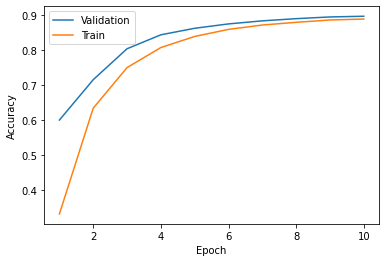

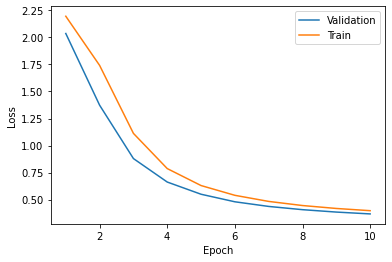

In [588]:
# Loss and accuracy plots for Model B
plt.plot(x, histb.history['val_accuracy'], label = "Validation")
plt.plot(x, histb.history['accuracy'], label = "Train")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(x,histb.history['val_loss'], label = "Validation")
plt.plot(x, histb.history['loss'], label = "Train")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()